In [1]:
%load_ext autoreload
%load_ext autotime

time: 167 µs (started: 2023-12-17 23:37:34 -08:00)


In [2]:
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings('ignore')
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=(SettingWithCopyWarning))

time: 518 ms (started: 2023-12-17 23:37:34 -08:00)


In [3]:
import dask
import dask.dataframe as dd
import numpy as np
import pandas as pd
print('pandas', pd.__version__)
print('dask', dask.__version__)
print('numpy', np.__version__)

pandas 2.1.2
dask 2023.9.3
numpy 1.24.3
time: 680 ms (started: 2023-12-17 23:37:34 -08:00)


In [4]:
trace_path = '/usr/workspace/iopp/wisio_logs/recorder_montage_32/_parquet'

time: 618 µs (started: 2023-12-17 23:37:35 -08:00)


In [5]:
%autoreload 2

from wisio.cluster_management import load_cluster_config
from wisio.recorder import RecorderAnalyzer

cluster_config = load_cluster_config('cluster_config_local.yml')
cluster_config.local_dir = '/var/tmp/wisio-recorder-montage'

analyzer = RecorderAnalyzer(
    checkpoint=True,
    checkpoint_dir='/usr/workspace/iopp/wisio_logs/_checkpoints/recorder_montage_32',
    cluster_config=cluster_config,
    working_dir='.wisio/recorder_montage_32',
    debug=False,
    output_type='console',
)

analyzer.cluster_manager.client.dashboard_link

[INFO] [23:37:46] Initializing Recorder analyzer [/g/g91/izzet/projects/wisio/wisio/analyzer.py:96]


'http://127.0.0.1:37031/status'

time: 2.74 s (started: 2023-12-17 23:37:46 -08:00)


In [6]:
%autoreload 2

result = analyzer.analyze_parquet(
    trace_path=trace_path, 
    metrics=['time'],
    # view_types=['proc_name'],
)

[INFO] [23:37:52] Read traces (0.16268489137291908) [/g/g91/izzet/projects/wisio/wisio/recorder.py:67]
[INFO] [23:37:52] Compute high-level metrics (0.022669605910778046) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:124]
[INFO] [23:37:52] Compute main view (0.026171916164457798) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:136]
[INFO] [23:37:53] Compute metric boundaries (0.46491905208677053) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:145]
[INFO] [23:37:57] Compute perspectives (3.893404435366392) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:168]
/g/g91/izzet/projects/wisio/wisio/analysis.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['bw_intensity'] = ddf['bw'] * ddf['intensity']
/g/g91/izzet/projects/wisio/wisio/analysis.py:

time: 11.4 s (started: 2023-12-17 23:37:52 -08:00)


In [7]:
result.output.console(show_debug=True)

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  Job Time             175.25 seconds                                                                            │
│  I/O Time             8.47 seconds                                                                              │
│                       ├── Read - 3.58 seconds (42.27%)                                                          │
│                       ├── Write - 8.13 seconds (95.91%)                                                         │
│                       └── Metadata - 0.30 seconds (3.52%)                                                       │
│  I/O Ops              6,985,234 ops                                                                             │
│                       ├── Read - 4,386,801 ops (62.80%)                                                         │
│                       ├── Write - 2,515,850 ops (36.02%)                                                        │
│                       └── Metadata - 82,583 ops (1.18%)                                                         │
│  I/O Size             57.69 GB                                                                                  │
│                       ├── Read - 31.98 GB (55.43%)                                                              │
│                       └── Write - 25.71 GB (44.57%)                                                             │
│  Read Xfer            4 KB-256 KB - 4,265 ops                                                                   │
│                       ├── <4 KB - 3,151 ops (73.88%)                                                            │
│                       ├── 4-16 KB - 66 ops (1.55%)                                                              │
│                       ├── 16-64 KB - 1,017 ops (23.85%)                                                         │
│                       └── 64-256 KB - 31 ops (0.73%)                                                            │
│  Write Xfer           4 KB-16 MB - 1,215 ops                                                                    │
│                       ├── <4 KB - 1,088 ops (89.55%)                                                            │
│                       ├── 4-16 KB - 64 ops (5.27%)                                                              │
│                       ├── 16-64 KB - 22 ops (1.81%)                                                             │
│                       ├── 64-256 KB - 10 ops (0.82%)                                                            │
│                       ├── 1-4 MB - 18 ops (1.48%)                                                               │
│                       └── 4-16 MB - 13 ops (1.07%)                                                              │
│  Node(s)              32 node(s)                                                                                │
│                       ├── lassen578 - 8.47 s (100.00%) - 0.53/1.52 GB R/W (0.93/2.64%) - 298,908 ops (4.28%)    │
│                       ├── lassen246 - 8.39 s (99.05%) - 0.38/8.11 GB R/W (0.66/14.05%) - 320,050 ops (4.58%)    │
│                       ├── lassen576 - 4.99 s (58.85%) - 0.48/4.95 GB R/W (0.83/8.59%) - 227,236 ops (3.25%)     │
│                       ├── lassen528 - 3.59 s (42.31%) - 2.74/0.46 GB R/W (4.75/0.80%) - 291,560 ops (4.17%)     │
│                       ├── lassen503 - 3.32 s (39.17%) - 0.47/0.59 GB R/W (0.81/1.02%) - 228,451 ops (3.27%)     │
│                       ├── lassen355 - 2.81 s (33.12%) - 8.99/0.40 GB R/W (15.58/0.70%) - 197,353 ops (2.83%)    │
│                       ├── lassen364 - 2.33 s (27.50%) - 0.80/0.59 GB R/W (1.39/1.03%) - 171,946 ops (2.46%)     │
│                       ├── lassen579 - 2.13 s (25.10%) - 0.60/1.20 GB R/W (1.03/2.08%) - 267,914 ops (3.84%)     │
│                       ├── lassen525 - 2.12 s (25.07%) 

time: 1.01 s (started: 2023-12-17 23:38:04 -08:00)


(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1554aca5cfa0>)

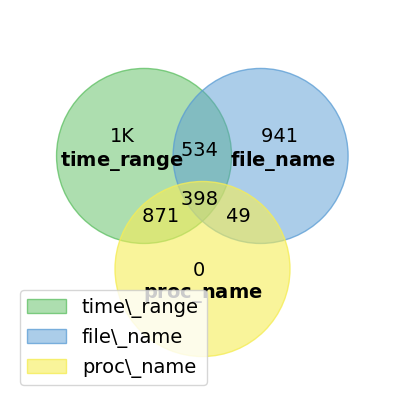

time: 378 ms (started: 2023-12-17 23:38:05 -08:00)


In [8]:
result.plots.view_relations3(
    metric='time',
    view_key1=('time_range',),
    view_key2=('file_name',),
    view_key3=('proc_name',),
)

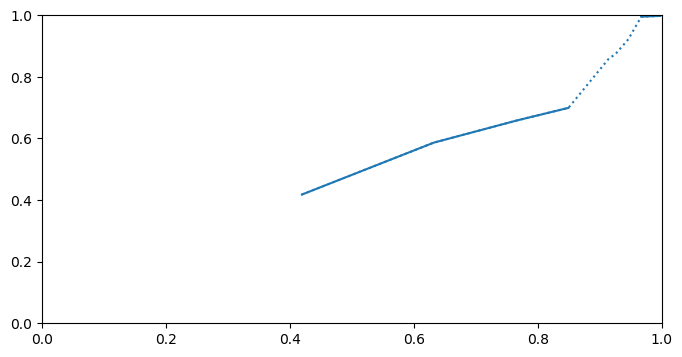

time: 238 ms (started: 2023-12-17 23:38:11 -08:00)


In [9]:
fig, ax = result.plots.slope(
    figsize=(8, 4),
    metric='time',
    view_keys=[('time_range',)],
)